In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load dataset
file_path = "D:/dm_assignment/datasets/logistic_regression_dataset.csv"
df = pd.read_csv(file_path)

X = df[['hrs']]
y = df['pass_fail']

In [2]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Coefficients
a0 = model.intercept_[0]
a1 = model.coef_[0][0]

print("Intercept (a0):", a0)
print("Coefficient for hrs (a1):", a1)
print(f"Equation: p = 1 / (1 + e^(-({a0:.2f} + {a1:.2f}*hrs)))")

Intercept (a0): -9.971005141040912
Coefficient for hrs (a1): 0.3596347877191969
Equation: p = 1 / (1 + e^(-(-9.97 + 0.36*hrs)))


In [3]:
# Prediction for a student with 20 hrs
new_x = np.array([[33]])
pred_prob = model.predict_proba(new_x)[0][1]  # probability of passing
pred_class = model.predict(new_x)[0]

print(f"\nPrediction: For 33 hours → Probability of pass = {pred_prob:.2f}, Class = {pred_class}")


Prediction: For 33 hours → Probability of pass = 0.87, Class = 1


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [4]:
import math

# log-odds for 95% probability
log_odds = np.log(0.95 / (1 - 0.95))

# Solve for hrs
required_hrs = (log_odds - a0) / a1
print(f"\nMinimum hours required for >95% probability of passing: {required_hrs:.2f}")


Minimum hours required for >95% probability of passing: 35.91


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


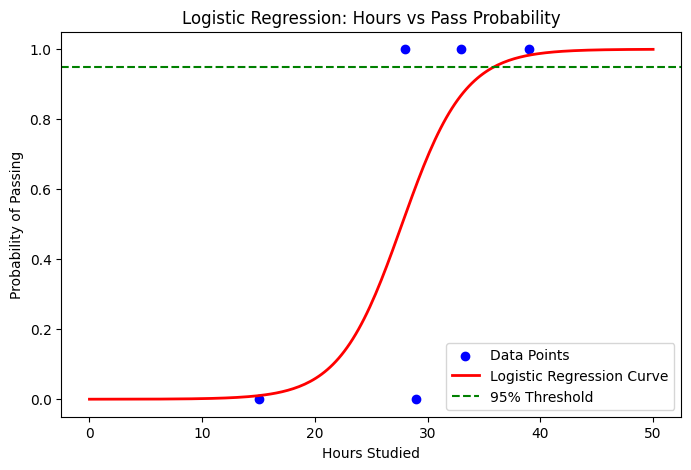

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Range of study hours for plotting
x_range = np.linspace(0, 50, 200).reshape(-1, 1)
y_probs = model.predict_proba(x_range)[:, 1]  # probability of passing

# Plot
plt.figure(figsize=(8,5))
plt.scatter(df['hrs'], df['pass_fail'], color='blue', label='Data Points')
plt.plot(x_range, y_probs, color='red', linewidth=2, label='Logistic Regression Curve')

# Reference line at 0.95 probability
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Threshold')

plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression: Hours vs Pass Probability")
plt.legend()
plt.show()